In [2]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\SANU\Miniconda3\python.exe -m pip install --upgrade pip' command.


In [11]:
pip install tensorflow --user

You should consider upgrading via the 'C:\Users\SANU\Miniconda3\python.exe -m pip install --upgrade pip' command.


In [10]:
%config Completer.use_jedi = False #this is command used for enable autocompletion in jupyt notebook


In [1]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import os
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error


16/16 [==============================] - 3s 4ms/step - loss: 0.2874
Train Score: 60.76 RMSE
Test Score: 60.59 RMSE
16/16 [==============================] - 3s 3ms/step - loss: 0.2063
Train Score: 11.54 RMSE
Test Score: 11.28 RMSE
16/16 [==============================] - 4s 3ms/step - loss: 0.1928
Train Score: 60.56 RMSE
Test Score: 60.73 RMSE
16/16 [==============================] - 3s 3ms/step - loss: 0.2579
Train Score: 189.27 RMSE
Test Score: 185.71 RMSE
16/16 [==============================] - 3s 3ms/step - loss: 0.1054
Train Score: 141.41 RMSE
Test Score: 140.90 RMSE
16/16 [==============================] - 3s 3ms/step - loss: 0.3405
Train Score: 132.06 RMSE
Test Score: 104.60 RMSE
16/16 [==============================] - 3s 3ms/step - loss: 0.2720
Train Score: 271.31 RMSE
Test Score: 248.53 RMSE
16/16 [==============================] - 3s 4ms/step - loss: 0.2982
Train Score: 121.78 RMSE
Test Score: 224.04 RMSE
16/16 [==============================] - 3s 3ms/step - loss: 0.4345
Tr

IndexError: invalid index to scalar variable.

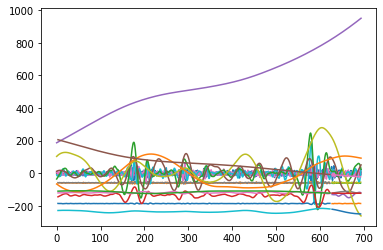

In [7]:
#os.chdir("C:/Users/kapil/Desktop")

df=pd.read_excel("ceemd.xlsx")
dataset = pd.DataFrame(df)
#dataset
store2=[]
store = []
store1 = []
for i in range(len(df.columns)):
    cols = [i]
    dataframe = pd.read_excel('ceemd.xlsx', usecols=cols)
    scaler = MinMaxScaler(feature_range=(0, 1))
    dataset = scaler.fit_transform(dataframe)
    # print(dataset)


    def create_dataset(dataset, look_back):
        dataX, dataY = [], []
        for i in range(len(dataset) - look_back - 1):
            a = dataset[i:(i + look_back), 0]
            dataX.append(a)
            dataY.append(dataset[i + look_back, 0])
        return numpy.array(dataX), numpy.array(dataY)


    train_size = int(len(dataset) * 0.90)
    test_size = len(dataset) - train_size
    train, test = dataset[0:train_size, :], dataset[train_size:len(dataset), :]
    # reshape into X=t and Y=t+1
    look_back = 3
    trainX, trainY = create_dataset(train, look_back)
    testX, testY = create_dataset(test, look_back)
    # reshape input to be [samples, time steps, features]
    trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
    testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
    # create and fit the LSTM network
    model = Sequential()
    model.add(LSTM(4, input_shape=(1, look_back)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(trainX, trainY, epochs=1, batch_size=40, verbose=1)
    # make predictions
    trainPredict = model.predict(trainX)
    testPredict = model.predict(testX)
    numpy.save('.npy', testPredict)
    numpy.save('.npy', testPredict)
    # invert predictions
    trainPredict = scaler.inverse_transform(trainPredict)
    trainY = scaler.inverse_transform([trainY])
    testPredict = scaler.inverse_transform(testPredict)
#     print(testPredict)
    testY = scaler.inverse_transform([testY])
    # calculate root mean squared error
    trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:, 0]))
    print('Train Score: %.2f RMSE' % (trainScore))
    testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:, 0]))
    print('Test Score: %.2f RMSE' % (testScore))
    # shift train predictions for plotting
    trainPredictPlot = numpy.empty_like(dataset)
    trainPredictPlot[:, :] = numpy.nan
    trainPredictPlot[look_back:len(trainPredict) + look_back, :] = trainPredict
    # shift test predictions for plotting
    testPredictPlot = numpy.empty_like(dataset)
    testPredictPlot[:, :] = numpy.nan
    testPredictPlot[len(trainPredict) + (look_back * 2) + 1:len(dataset) - 1, :] = testPredict
    # plot baseline and predictions
    plt.plot(scaler.inverse_transform(dataset))
    plt.plot(trainPredictPlot)
    plt.plot(testPredictPlot)
    #plt.show()
    df1=pd.DataFrame()
    
    store.append(testPredict)
    store1.append(testScore)
    store2.append(testY)
store
STORE_testpredict=numpy.sum(store)
print(STORE_testpredict)
# print(store1)
# print(store2)
STORE_testY=numpy.sum(store2)
print(STORE_testY)
print(STORE_testpredict)
testScorefinal = math.sqrt(mean_squared_error(STORE_testY[0], STORE_testpredict[:, 0]))
print(testScorefinal)

In [13]:
type(store)

list

In [14]:
import numpy as np

In [23]:
x=np.array([store])

In [26]:
x

array([[[[ -61.732887 ],
         [ -53.811024 ],
         [ -56.380844 ],
         [ -63.272038 ],
         [ -57.872517 ],
         [ -62.709583 ],
         [ -53.54259  ],
         [ -58.31051  ],
         [ -60.662243 ],
         [ -60.830364 ],
         [ -59.66952  ],
         [ -55.995632 ],
         [ -60.960693 ],
         [ -60.033688 ],
         [ -59.597855 ],
         [ -56.442425 ],
         [ -61.027874 ],
         [ -60.99994  ],
         [ -55.91888  ],
         [ -61.601143 ],
         [ -60.39269  ],
         [ -54.802944 ],
         [ -62.381977 ],
         [ -59.561325 ],
         [ -58.95912  ],
         [ -58.62451  ],
         [ -60.55936  ],
         [ -58.651253 ],
         [ -58.647808 ],
         [ -60.41863  ],
         [ -59.136303 ],
         [ -59.362873 ],
         [ -59.063362 ],
         [ -60.210827 ],
         [ -58.55268  ],
         [ -59.104576 ],
         [ -58.417706 ],
         [ -61.30986  ],
         [ -59.923073 ],
         [ -57.2691   ],


In [34]:
z=np.squeeze(x)


In [45]:
mat=np.matrix(z)

In [47]:
dffinal=pd.DataFrame(mat.transpose())

In [48]:
dffinal

,0,1,2,3,4,5,6,7,8
0,-61.732887,-11.414802,-55.615162,-186.956390,-130.887177,-122.369644,-221.329346,-122.666443,-9.380329
1,-53.811024,-9.673904,-57.932823,-186.736191,-131.460846,-121.993538,-221.720627,-122.737625,-9.603703
2,-56.380844,-9.756007,-60.950176,-187.337936,-131.811478,-121.654007,-222.130646,-122.807861,-9.826437
3,-63.272038,-11.415086,-61.622387,-187.591721,-131.994019,-121.344482,-222.560150,-122.877029,-10.048489
4,-57.872517,-13.209462,-58.073917,-186.753067,-131.978653,-121.044579,-223.009613,-122.945030,-10.269855
...,...,...,...,...,...,...,...,...,...
61,-61.925224,-11.672059,-62.103355,-184.771301,-117.507538,-122.761185,-249.758102,-123.139832,-21.499348
62,-57.081070,-10.980675,-58.572742,-185.115265,-117.154625,-122.989937,-249.877029,-123.098083,-21.667437
63,-59.892597,-10.070804,-55.805443,-185.125580,-117.228622,-123.189064,-249.981003,-123.056290,-21.834431
64,-59.415253,-11.185410,-54.867596,-185.262039,-117.832298,-123.359741,-250.070053,-123.014488,-22.000240


In [53]:
dffinal["sum"]=dffinal.sum(axis=1)

In [54]:
dffinal

,0,1,2,3,4,5,6,7,8,sum
0,-61.732887,-11.414802,-55.615162,-186.956390,-130.887177,-122.369644,-221.329346,-122.666443,-9.380329,-922.352173
1,-53.811024,-9.673904,-57.932823,-186.736191,-131.460846,-121.993538,-221.720627,-122.737625,-9.603703,-915.670227
2,-56.380844,-9.756007,-60.950176,-187.337936,-131.811478,-121.654007,-222.130646,-122.807861,-9.826437,-922.655396
3,-63.272038,-11.415086,-61.622387,-187.591721,-131.994019,-121.344482,-222.560150,-122.877029,-10.048489,-932.725403
4,-57.872517,-13.209462,-58.073917,-186.753067,-131.978653,-121.044579,-223.009613,-122.945030,-10.269855,-925.156677
...,...,...,...,...,...,...,...,...,...,...
61,-61.925224,-11.672059,-62.103355,-184.771301,-117.507538,-122.761185,-249.758102,-123.139832,-21.499348,-955.138000
62,-57.081070,-10.980675,-58.572742,-185.115265,-117.154625,-122.989937,-249.877029,-123.098083,-21.667437,-946.536804
63,-59.892597,-10.070804,-55.805443,-185.125580,-117.228622,-123.189064,-249.981003,-123.056290,-21.834431,-946.183777
64,-59.415253,-11.185410,-54.867596,-185.262039,-117.832298,-123.359741,-250.070053,-123.014488,-22.000240,-947.007141
